# Proyek Analisis Data: Bike Sharing Dataset (Day)
- **Nama:** Sopian Syauri
- **Email:** syr.sopian.01@gmail.com
- **ID Dicoding:** sopian_syauri

## Menentukan Pertanyaan Bisnis

- Pada bulan apakah yang menunjukkan peminjaman sepeda mengalami lonjakan?
- Apa yang menyebabkan peminjaman sepeda tersebut melonjak?

## Import Semua Packages/Library yang Digunakan

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [15]:
df = pd.read_csv('dataset/bike_sharing_dataset_day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Terdapat 16 kolom data
- Terdapat 731 baris data

### Assessing Data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tidak terdapat missing value
- Terdapat ketidaktepatan tipe data pada kolom 'dteday' yang seharusnya bertipe data date

In [17]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Semua kolom pada dataset tersebut aman dan tidak terdapat inaccurate value

### Cleaning Data

In [18]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom 'dteday' sudah diubah tipe datanya menjadi datetime sesuai dengan valuenya

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
df.groupby(by=['yr','mnth']).agg({
    'casual':['min','max','sum','mean'],
    'registered':['min','max','sum','mean'],
    'cnt':['min','max','sum','mean']
})

casual                           registered                \
           min   max    sum         mean        min   max     sum   
yr mnth                                                             
0  1         9   331   3073    99.129032        416  1844   35116   
   2        47   694   6242   222.928571        905  2348   41973   
   3        46  1424  12826   413.741935        491  2355   51219   
   4       121  1965  22346   744.866667        674  3722   72524   
   5       255  2355  31050  1001.612903       2213  4238  104771   
   6       513  1920  30612  1020.400000       2993  4488  112900   
   7       562  3065  36452  1175.870968       2298  4220  104889   
   8       226  1914  28842   930.387097        889  4614  107849   
   9       118  2521  26545   884.833333       1689  4372  100873   
   10       57  2397  25222   813.612903        570  4267   98289   
   11       69  1275  15594   519.800000        935  3891   86573   
   12       50   706   8448   272.516129        451  3672   78875   
1  1        67  1070   8969   289.322581       1234  4185   87775   
   2        65  1435   8721   300.724138       1456  4546   94416   
   3       203  3155  31618  1019.935484       2339  5893  133257   
   4       120  3252  38456  1281.866667        907  5950  135768   
   5       342  3410  44235  1426.935484       2501  6433  151630   
   6       477  2963  43294  1443.133333       3594  6456  159536   
   7       747  2562  41705  1345.322581       3195  6790  161902   
   8       935  2827  43197  1393.451613       3341  6541  171306   
   9       371  3160  43778  1459.266667       3197  6946  174795   
   10        2  3031  34538  1114.129032         20  6911  164303   
   11      123  2290  21009   700.300000       1470  5520  131655   
   12        9  1153  13245   427.258065        432  6055  110468   

                       cnt                             
                mean   min   max     sum         mean  
yr mnth                                                
0  1     1132.774194   431  1985   38189  1231.903226  
   2     1499.035714  1005  2927   48215  1721.964286  
   3     1652.225806   605  3239   64045  2065.967742  
   4     2417.466667   795  5312   94870  3162.333333  
   5     3379.709677  2633  5805  135821  4381.322581  
   6     3763.333333  3767  5515  143512  4783.733333  
   7     3383.516129  3285  6043  141341  4559.387097  
   8     3479.000000  1115  5895  136691  4409.387097  
   9     3362.433333  1842  5423  127418  4247.266667  
   10    3170.612903   627  5511  123511  3984.225806  
   11    2885.766667  1495  4486  102167  3405.566667  
   12    2544.354839   705  3940   87323  2816.870968  
1  1     2831.451613  1301  4521   96744  3120.774194  
   2     3255.724138  1529  5062  103137  3556.448276  
   3     4298.612903  3194  8362  164875  5318.548387  
   4     4525.600000  1027  7460  174224  5807.466667  
   5     4891.290323  2843  8294  195865  6318.225806  
   6     5317.866667  4127  8120  202830  6761.000000  
   7     5222.645161  4459  8173  203607  6567.967742  
   8     5526.000000  4549  7865  214503  6919.451613  
   9     5826.500000  4073  8714  218573  7285.766667  
   10    5300.096774    22  8156  198841  6414.225806  
   11    4388.500000  2277  6852  152664  5088.800000  
   12    3563.483871   441  6606  123713  3990.741935

**Insight:**
- Pivot tabel tersebut menampilkan terkait jumlah minimal, maksimal, dan rata-rata peminjaman sepeda dari setiap jenis peminjaman (casual dan registered) per bulannya untuk setiap tahun yang berbeda (tahun 0 merepresentasikan tahun 2011 dan tahun 1 merepresentasikan tahun 2012)
- Berdasarkan pivot tabel tersebut bahwa jumlah peminjaman paling sedikit terjadi pada tahun 0 bulan 1 (Januari 2011) dan jumlah peminjaman paling banyak terjadi pada tahun 1 bulan 9 (September 2012)

In [20]:
df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


**Insight:**
- Tabel korelasi tersebut menampilkan terkait hubungan antar setiap kolom dengan kolom yang lainnya
- Berdasarkan tabel korelasi tersebut bahwa terdapat hubungan korelasi positif terhadap jumlah peminjaman sepeda (kolom 'cnt') baik itu jenis 'casual' maupun jenis 'registered' yang cukup besar diantara yang lainnya yaitu terdapat pada kolom 'temp' dan 'atemp', sehngga dapat disimpulkan kedua kolom tersebut merupakan faktor yang dapat mempengaruhi jumlah peminjaman sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:

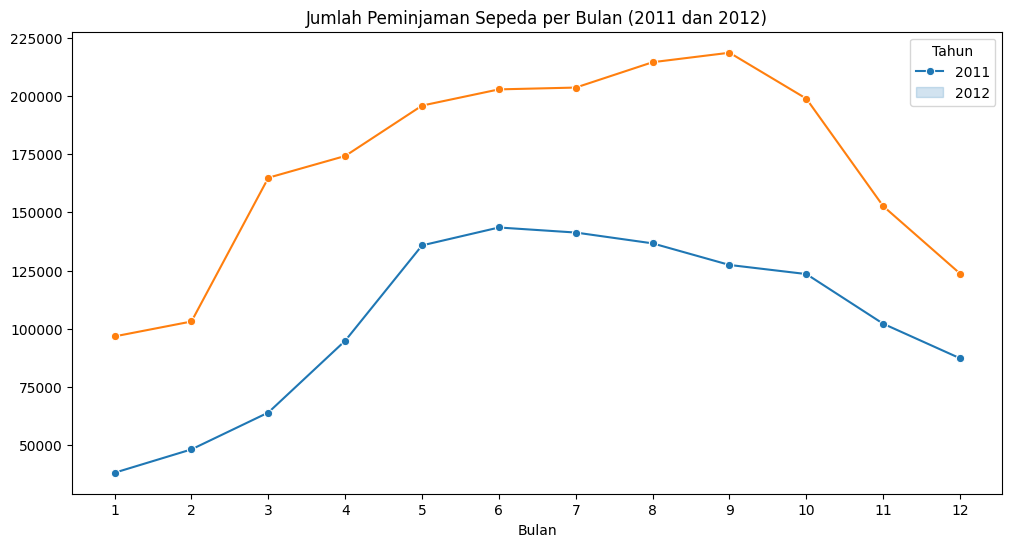

In [21]:
pivot_table = df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=pivot_table, marker='o')
plt.title('Jumlah Peminjaman Sepeda per Bulan (2011 dan 2012)')
plt.xlabel('Bulan')
plt.ylabel('')
plt.xticks(np.arange(1,13))
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.show()

### Pertanyaan 2:

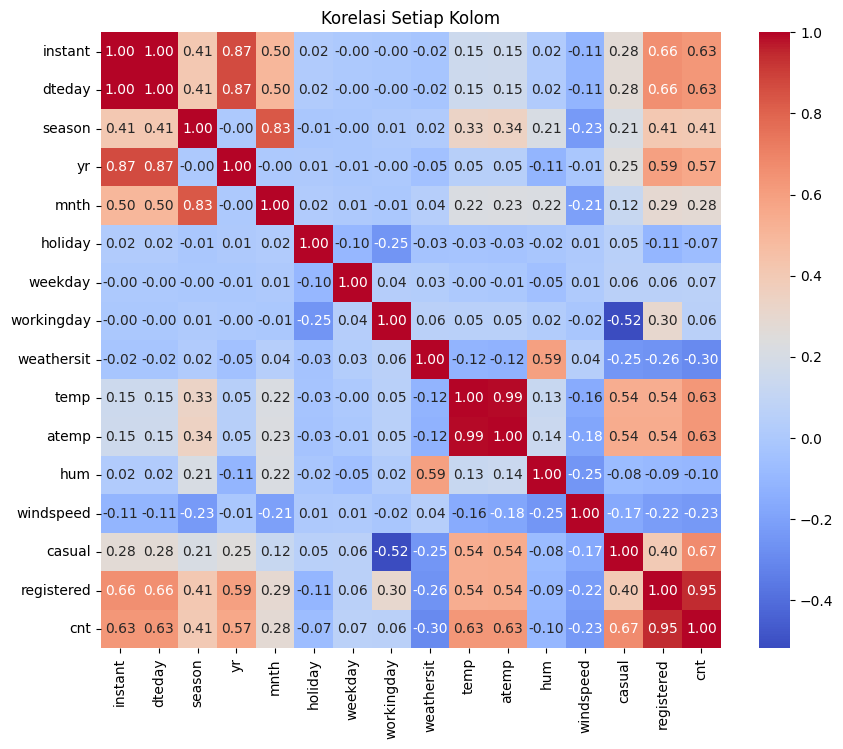

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Setiap Kolom')
plt.show()

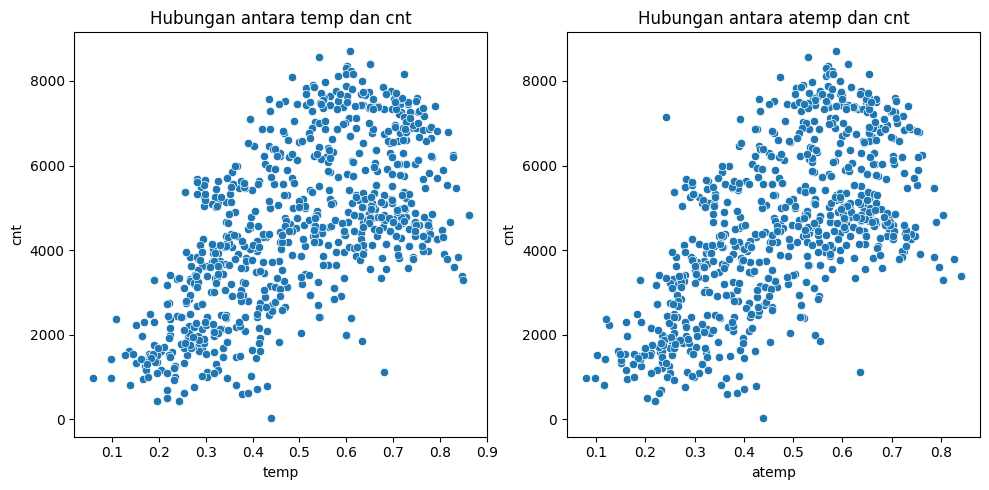

In [23]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Hubungan antara temp dan cnt')

plt.subplot(1, 2, 2)
sns.scatterplot(x='atemp', y='cnt', data=df)
plt.title('Hubungan antara atemp dan cnt')

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan visualisasi pada pertanyaan 1, jumlah peminjaman sepeda terbanyak terjadi pada bulan September 2012, sedangkan jumlah peminjaman sepeda terkecil terjadi pada bulan Januari 2011
- Berdasarkan visualisasi pada pertanyaan 2, visualisasi untuk korelasi yang terbesar adalah pada kolom 'tmp' dan 'atmp', sehingga dilakukan visualisasi mendalam dengan scatter plot untuk kolom 'tmp' dan 'atmp' dengan kolom 'cnt' dan hasilnya menunjukan korelasi positif yang artinya semakin tinggi tmp dan atmp maka semakin banyak pula peminjaman sepeda yang terjadi

In [ ]:
df.to_csv('dashboard/bike_sharing_dataset_day_clean.csv', index=False)

## Analisis Lanjutan (Opsional)

### Tujuan
Analisis Clustering dilakukan dengan tujuan untuk memahami lebih dalam bagaimana kategori temperatur memengaruhi pola peminjaman sepeda dengan membagi data temperatur ke dalam tiga kelompok: rendah, sedang, dan tinggi


Cluster analysis berdasarkan temperature
                       temp               atemp          
                        min       max       min       max
temperature_group                                        
Rendah             0.059130  0.315833  0.079070  0.339004
Sedang             0.316522  0.685833  0.301125  0.645858
Tinggi             0.686667  0.861667  0.242400  0.840896


C:\Users\syrso\AppData\Local\Temp\ipykernel_16368\4259303052.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("temperature_group").agg({


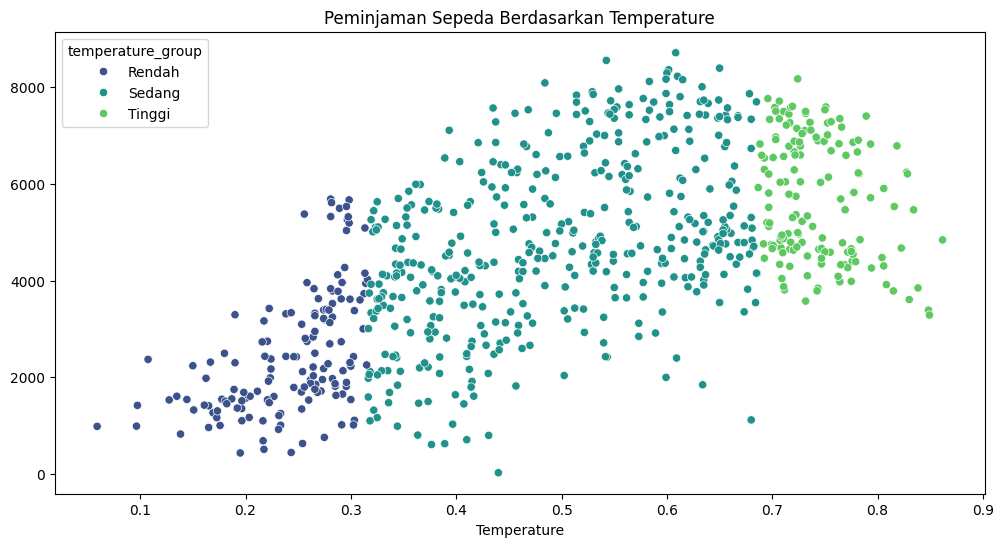

In [24]:
low_temp_threshold = df['temp'].quantile(0.2)
high_temp_threshold = df['temp'].quantile(0.8)

df['temperature_group'] = pd.cut(df['temp'], bins=[-1, low_temp_threshold, high_temp_threshold, 1], labels=['Rendah', 'Sedang', 'Tinggi'], include_lowest = True)

print("\nCluster analysis berdasarkan temperature")
print(df.groupby("temperature_group").agg({
    'temp': ['min','max'],
    'atemp': ['min','max'],
}))

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='temp', y='cnt', hue='temperature_group', palette='viridis')
plt.title('Peminjaman Sepeda Berdasarkan Temperature')
plt.xlabel('Temperature')
plt.ylabel('')
plt.show()

In [25]:
cnt_by_temp = df.groupby('temperature_group')['cnt'].sum()

cnt_by_temp

C:\Users\syrso\AppData\Local\Temp\ipykernel_16368\3017846968.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cnt_by_temp = df.groupby('temperature_group')['cnt'].sum()


temperature_group
Rendah     359160
Sedang    2103970
Tinggi     829549
Name: cnt, dtype: int64

**Insight:**
- Analisis ini dapat mengidentifikasi apakah peminjaman lebih tinggi pada temperatur rendah, sedang, atau tinggi. Dan hasilnya ternyata peminjaman lebih banyak dilakukakan disaat temperaturenya di keadaan sedang atau sekitar 0.316522 - 0.685833 satuan suhu.
- Hasil dari analisis ini sangat bermanfaat dalam pengambilan keputusan, seperti mengelola stok sepeda, merencanakan strategi layanan berdasarkan prediksi kondisi cuaca, atau memberikan rekomendasi kepada pengguna terkait waktu optimal untuk memanfaatkan layanan peminjaman sepeda.

## Conclusion

- Jumlah peminjaman sepeda terbanyak terjadi pada bulan September 2012 dan jumlah peminjaman sepeda terkecil terjadi pada bulan Januari 2011
- 'tmp' dan 'atmp' mempengaruhi 'cnt' yang menunjukan korelasi positif, artinya semakin tinggi tmp dan atmp maka kemungkinan semakin banyak pula peminjaman sepeda yang terjadi